# Resilience and fault injection mini-framework demo

In [1]:
%matplotlib inline

In [2]:
# For plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import LogNorm
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

# For parsing Matrix files
import scipy.io

import numpy as np

## Experiment 
### Class to easily run the algorithm with different inputs / parameters, and to save the result / data recorded

## Algorithm
### Class to encapsulate the implementation

## Fault
### Class implementing the faulty operations

## Parameters
### Class extending simple python dictionnaries to represent parameters

# Exemple

## Import modules

In [3]:
from Experiment import *
from Parameters import *
from Fault import *
from Algorithm import *

## Define inputs

In [4]:
inputs = []

#### Matrice HB/arc130 (https://www.cise.ufl.edu/research/sparse/matrices/HB/arc130.html)

239734.79553
3.95980213558e-06


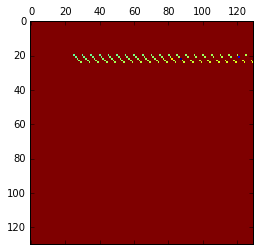

In [5]:
if True:
    A = scipy.io.loadmat('./arc130.mat')['Problem'][0][0][1].toarray()
    n = A.shape[0]
    plt.matshow(A)
    u, s, v = np.linalg.svd(A)
    print s[0]
    print s[-1]
    x = np.ones((n, 1))
    b = A.dot(x)
    x = np.zeros((n, 1))

#### Matrice gre_216a

1.01116601557
0.00981568462302


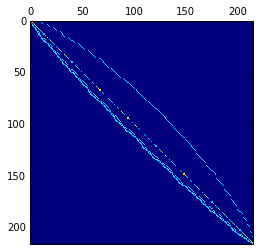

In [6]:
if True:
    A = scipy.io.loadmat('./gre_216a.mat')['Problem'][0][0][1].toarray()
    n = A.shape[0]
    plt.matshow(A)
    u, s, v = np.linalg.svd(A)
    print s[0]
    print s[-1]
    x = np.ones((n, 1))
    b = A.dot(x)
    x = np.zeros((n, 1))
   

In [7]:
inputs += [{"A": A, "b": b, "x0": x}]

## Define the algorithm

In [8]:
import gmres

#### Algorithm parameters

In [9]:
# parameters that won't change during the whole experiment
algorithm_parameters = Parameters()
algorithm_parameters["m"] = n
algorithm_parameters["tol"] = 1.e-12
algorithm_parameters["iterMax"] = n
algorithm_parameters["orthMethod"] = gmres.modified_gramschmidt
algorithm_parameters["dtype"] = 'd'
algorithm_parameters["vulnerable"] = True


#### Implementation (gmres)

In [10]:
def implementation(self, input, algorithm_parameters, experiment_parameters, save_data=True, display=False):
    gmres.implementation(self, input, algorithm_parameters, experiment_parameters, save_data, display)

In [11]:
gmres_algorithm = Algorithm(algorithm_parameters, implementation)

## Run the experiment

### Define the experiment parameters

In [12]:
# Parameters that may change during the experiment
experiment_parameters = Parameters()
# it can be a generator yielding a parameters object
from sys import stdout

#for example, at each execution, the iteration when the fault occurs is increased
def experiment_parameters_generator():
    parameters = Parameters()
    fault_parameters = {}
    parameters["fault_parameters"] = fault_parameters
    fault_parameters["fault_callback"] = lambda fault: (stdout.write(" %s " % str(fault)))
    i = 0
    while True:
        parameters["fault_parameters"]["timer"]= i
        i += 1
        yield parameters

experiment_parameters = experiment_parameters_generator()
#experiment_parameters["fault_parameters"] = fault_parameters

### Setup the experiment (algorithm, parameters and inputs)

In [13]:
E = Experiment(experiment_parameters, gmres_algorithm)
E.set_inputs(inputs)


### Run the experiment

In [14]:
E.run(show_progress=True, n=10)

Complete ! 


## Display the experiment result

In [15]:
E.get_results()[0]

({'A': array([[ 0.75,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
         [ 0.25,  0.5 ,  0.  , ...,  0.  ,  0.  ,  0.  ],
         [ 0.  ,  0.25,  0.5 , ...,  0.  ,  0.  ,  0.  ],
         ..., 
         [ 0.  ,  0.  ,  0.  , ...,  0.5 ,  0.  ,  0.  ],
         [ 0.  ,  0.  ,  0.  , ...,  0.25,  0.5 ,  0.  ],
         [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.25,  0.75]]),
  'b': array([[ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.25],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.25],
         [ 1.

## Display the experiment data

In [16]:
E.get_data()[0]

{'H': array([[ 1.00505769,  0.01369287,  0.02078543, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.7823699 ,  0.1859654 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.62762441, ...,  0.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]),
 'V': array([[ 0.06784535, -0.0045028 ,  0.00168327, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.06784535, -0.0045028 ,  0.00168327, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.06784535, -0.0045028 ,  0.00168327, ...,  0.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.06784535, -0.0045028 ,  0.0016

## Plot convergence history

In [17]:
def plot_2D(X, Y, title = '', grid = True, label = "", log=False, linestyle = None):

    if log:
        p = plt.semilogy(X, Y[:len(X)], label=label)
    else:
        p = plt.plot(X, Y[:len(X)], label=label)
    if linestyle:
        plt.setp(p, linestyle=linestyle) 
    plt.title(title)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if grid:
        plt.grid(True)


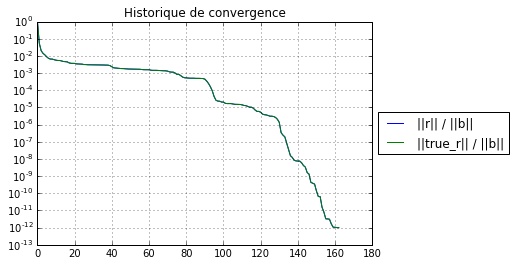

In [18]:
X = np.arange(0, E.get_data('iteration_count')[0]+1)
Y = E.get_data('residuals')[0]
Z = E.get_data('true_residuals')[0]

plot_2D(X, Y, log=True, title='Historique de convergence', label = "||r|| / ||b||")
plot_2D(X, Z, log=True, title='Historique de convergence', label = "||true_r|| / ||b||")

In [19]:
E.get_data('faults')

[[{'bit': 10,
   'loc': {'i': 62, 'j': 0, 'k': 96},
   'register': 'middle',
   'register_after': 0.01696133828882251,
   'register_before': 0.016961338288818958,
   'timer': 0,
   'value_after': 0.067845353155279384,
   'value_before': 0.067845353155275831}],
 [{'bit': 13,
   'loc': {'i': 44, 'j': 0, 'k': 35},
   'register': 'middle',
   'register_after': -0.0011257000880138927,
   'register_before': -0.0011257000880121164,
   'timer': 1,
   'value_after': -0.0045028003520502418,
   'value_before': -0.0045028003520484654}],
 [{'bit': 48,
   'loc': {'i': 69, 'j': 0, 'k': 69},
   'register': 'middle',
   'register_after': -0.017309443919588673,
   'register_before': -0.016332881419588673,
   'timer': 2,
   'value_after': -0.050952508800377029,
   'value_before': -0.049975946300377029}],
 [{'bit': 29,
   'check': None,
   'loc': {'i': 45, 'j': 0, 'k': 75},
   'register': 'right',
   'register_after': -0.0011112569806711692,
   'register_before': -0.001111257097086491,
   'timer': 3,
   '